In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('./testSet_v1.3.xlsx')

In [4]:
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"

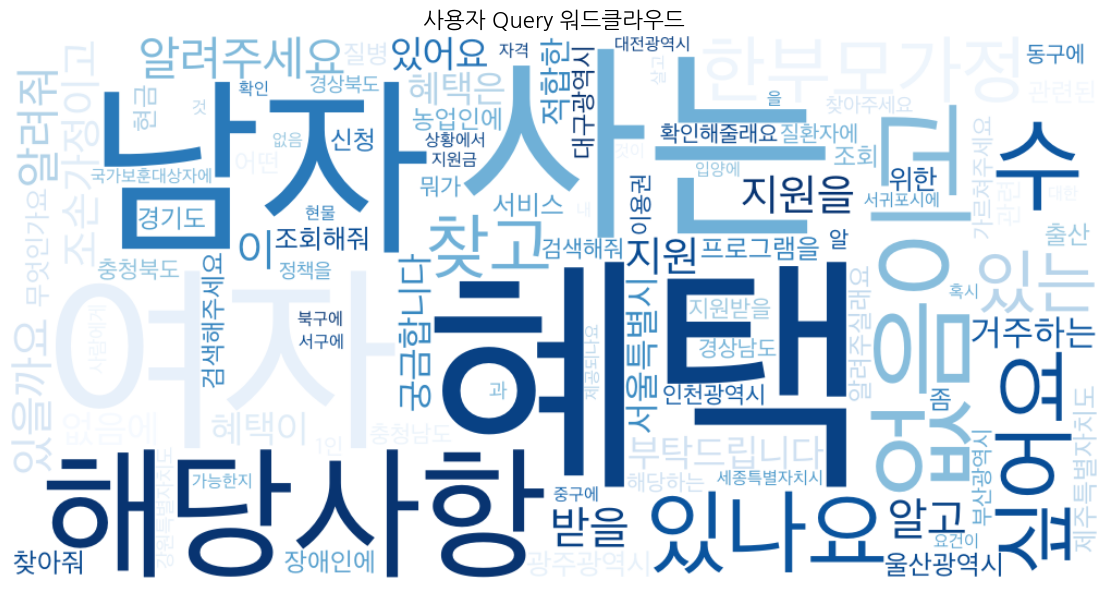

In [6]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import koreanize_matplotlib
import re

# 단어 토큰화 (띄어쓰기 기준, 정규식 활용)
all_words = ' '.join(df['query'].dropna().astype(str)).lower()
tokens = re.findall(r'\b\w+\b', all_words)
counter = Counter(tokens)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=1000,
    height=500,
    background_color='white',
    colormap='Blues',
    max_words=100
).generate_from_frequencies(counter)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('사용자 Query 워드클라우드', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
import re

def check_gender_match(row):
    query = row["query"]
    sql = row["sql"]
    if "여자" in query and "gender" in sql:
        return "여자 → 매핑됨"
    elif "여자" in query:
        return "여자 → 없음"
    elif "남자" in query and "gender" in sql:
        return "남자 → 매핑됨"
    elif "남자" in query:
        return "남자 → 없음"
    else:
        return "성별 언급 없음"

df["gender_mapping"] = df.apply(check_gender_match, axis=1)
df["gender_mapping"].value_counts()

gender_mapping
여자 → 매핑됨    3167
남자 → 매핑됨    2878
성별 언급 없음      38
남자 → 없음        3
여자 → 없음        2
Name: count, dtype: int64